# Demo code 

# Main Crawl def

In [1]:
from selenium import webdriver  # Automate web browser control
from selenium.webdriver.edge.options import Options  # Options for Edge browser
from selenium.webdriver.common.by import By  # Search for elements on the web page
from selenium.webdriver.support.ui import WebDriverWait  # Wait for a certain condition before the next operation
from selenium.webdriver.support import expected_conditions as EC  # Expected conditions in Selenium
import pandas as pd  
from datetime import datetime  
import time  # Library to create delay during execution



In [2]:
# set url, output_name, start_date, end_date

def get_data(url, output_csv, start_date_input, end_date_input):

    options=Options()     # tạo đối tượng Options, # các tùy chọn cho trình duyệt Edge 
    options.add_experimental_option('detach',True)    # add option: 'detach' - web chạy ở chế độ tách rời (detach model)
    driver=webdriver.Edge(options=options)  # tạo đối tượng webdrive sử dụng trình duyệt Edge và truyền đối tượng options vào
    # driver.get('https://finance.yahoo.com/quote/NLR/history?p=NLR')
    driver.get(url)
    
    def set_date_and_apply(start_date, end_date):
        """Hàm để đặt ngày bắt đầu và kết thúc, sau đó áp dụng thay đổi."""
        #### WebDriverWait(drive, seconds).until # Wait for a certain condition, before the next operation (wait command - Selenium)        
        #### element_to_be_clickable: Ensures that an element on a web page can be clicked.        
        #### presence_of_element_located: Ensures that an element is present on the web page.        
        #### visibility_of_element_located: Ensures that an element is present on the web page and visible.
        #### WebDriverWait can be used as an alternative to drive.find_element + time.sleep()

        time.sleep(5)
        driver.find_element(By.XPATH,'//*[@id="Col1-1-HistoricalDataTable-Proxy"]/section/div[1]/div[1]/div[1]/div/div/div[1]').click()
        # WebDriverWait(driver, 10).until(EC.element_to_be_clickable((By.XPATH,'//*[@id="Col1-1-HistoricalDataTable-Proxy"]/section/div[1]/div[1]/div[1]/div/div/div[1]'))).click()
          
        driver.find_element(By.XPATH, '//*[@id="dropdown-menu"]/div/div[1]/input').send_keys(start_date) #### .send_keys(...): Sends the specified key to that element.
        # WebDriverWait(driver, 10).until(EC.element_to_be_clickable((By.XPATH, '//*[@id="dropdown-menu"]/div/div[1]/input'))).send_keys(start_date)
        driver.find_element(By.XPATH,'//*[@id="dropdown-menu"]/div/div[2]/input').send_keys(end_date)
        # WebDriverWait(driver, 10).until(EC.element_to_be_clickable((By.XPATH, '//*[@id="dropdown-menu"]/div/div[2]/input'))).send_keys(end_date)

        driver.find_element(By.XPATH,'//*[@id="dropdown-menu"]/div/div[3]/button[1]').click()
        # WebDriverWait(driver, 10).until(EC.element_to_be_clickable((By.XPATH, '//*[@id="dropdown-menu"]/div/div[3]/button[1]'))).click()
        
        driver.find_element(By.XPATH,'//*[@id="Col1-1-HistoricalDataTable-Proxy"]/section/div[1]/div[1]/button').click()
        # WebDriverWait(driver, 10).until(EC.element_to_be_clickable((By.XPATH, '//*[@id="Col1-1-HistoricalDataTable-Proxy"]/section/div[1]/div[1]/button'))).click()
       
    set_date_and_apply(start_date_input, end_date_input)

    # Scroll down to download all data, (if you haven't scrolled down yet, the data will only load up to 100 lines)
    # WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.XPATH, '//*[@id="Col1-1-HistoricalDataTable-Proxy"]/section/div[2]/table')))  # wait load web
    time.sleep(5)

    previous_length = 0
    while True:
        # Cuộn xuống bảng
        bottom = driver.find_element(By.XPATH, '//*[@id="Col1-1-HistoricalDataTable-Proxy"]/section/div[2]/table/tfoot/tr')
        driver.execute_script("arguments[0].scrollIntoView(true);", bottom)

        ### wait for update web
        # WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.XPATH, '//*[@id="Col1-1-HistoricalDataTable-Proxy"]/section/div[2]/table/tbody/tr')))
        time.sleep(5)

        # # Check if the len(rows) changes or not
        current_length = len(driver.find_elements(By.XPATH, '//*[@id="Col1-1-HistoricalDataTable-Proxy"]/section/div[2]/table/tbody/tr'))
        if current_length == previous_length:
            break
        else:
            previous_length = current_length
    rows = driver.find_elements(By.XPATH, '//*[@id="Col1-1-HistoricalDataTable-Proxy"]/section/div[2]/table/tbody/tr')

    # crawl rows, (avoid index out of the range, when collect for col)
    data = []   # list save
    for row in rows:
        cells = row.find_elements(By.TAG_NAME, 'td')     
        # find_elements, find all cells (td tags in HTML). find_elements(By.TAG_NAME, ...), find_elements(By.XPATH, ...)
        if len(cells) >= 5:
            date_text = cells[0].text
            close_text = cells[4].text    # close ở cột cells[4]
            numerical_date = datetime.strptime(date_text, '%b %d, %Y').strftime('%d/%m/%Y')
            # datetime - Convert STRP string to STRF specific date %Y-%m-%d, or %d-%m-%Y, ... (for example from 'Jan 01, 2020' to ' 2020-01-01').
            data.append({'time': numerical_date, 'close': close_text})

    df = pd.DataFrame(data)
    # df.to_csv('crude_oil.csv', index=False)
    df.to_csv(output_csv, index=False)
    print(df)



In [3]:
# demo
url = 'https://finance.yahoo.com/quote/NLR/history?p=NLR'
output_csv = 'demo_url.csv'
start_date_input = '05042023'     # 04/01/2023
end_date_input = '11042023'       # 03/11/2023, set lên 04/11/2023 để lấy được ngày 03/11/2023
get_data(url, output_csv, start_date_input, end_date_input)

           time  close
0    03/11/2023  71.36
1    02/11/2023  72.14
2    01/11/2023  70.98
3    31/10/2023  69.93
4    30/10/2023  68.35
..          ...    ...
123  10/05/2023  58.44
124  09/05/2023  58.20
125  08/05/2023  57.09
126  05/05/2023  57.00
127  04/05/2023  55.76

[128 rows x 2 columns]


# Crawl Các Chỉ Số: S&P 500, Russel 2000 Index, Dollar Index, EuroUSD



1. **S&P 500:** https://finance.yahoo.com/quote/%5EGSPC/history (S&P 500 (^GSPC)
SNP - SNP Real Time Price. Currency in USD)
   - Chỉ số S&P 500 là một chỉ số chứng khoán của 500 công ty lớn niêm yết trên sàn giao dịch chứng khoán ở Mỹ.
   - Nó thường được coi là chỉ số tốt nhất về hiệu suất của thị trường chứng khoán Mỹ và kinh tế rộng lớn hơn.

2. **Russell 2000 Index:** https://finance.yahoo.com/quote/%5ERUT/history (Russell 2000 (^RUT)
Chicago Options - Chicago Options Delayed Price. Currency in USD)
   - Russell 2000 là một chỉ số chứng khoán đại diện cho 2000 công ty nhỏ có vốn hóa thị trường thấp nhất trong tổng số 3000 công ty lớn nhất tại Mỹ, được theo dõi bởi Russell 3000 Index.
   - Nó cung cấp một hình ảnh rõ ràng về hiệu suất của phân khúc công ty nhỏ và vừa.

3. **Dollar Index (DXY):** https://finance.yahoo.com/quote/DX-Y.NYB/history   (ICE US Dollar Index - Index - C (DX-Y.NYB)
ICE Futures - ICE Futures Real Time Price. Currency in USD)
   - Dollar Index là một chỉ số đo lường giá trị của đồng đô la Mỹ so với một rổ tiền tệ của các đối tác thương mại chính của Mỹ.
   - Nó thường được sử dụng để đánh giá sức mạnh tổng thể của đồng đô la Mỹ trên thị trường toàn cầu.

4. **EuroUSD (EUR/USD):** https://finance.yahoo.com/quote/EURUSD%3DX/history  (EUR/USD (EURUSD=X)
CCY - CCY Delayed Price. Currency in USD): Euro so với USD

In [3]:
start_date_input = '01042010'     # 04/01/2010
end_date_input = '11042023'       # 03/11/2023, set lên 04/11/2023 để lấy được ngày 03/11/2023

In [5]:
url = 'https://finance.yahoo.com/quote/%5EGSPC/history'
output_csv = 'S&P_500_(GSPC).csv'
get_data(url, output_csv, start_date_input, end_date_input)

            time     close
0     03/11/2023  4,358.34
1     02/11/2023  4,317.78
2     01/11/2023  4,237.86
3     31/10/2023  4,193.80
4     30/10/2023  4,166.82
...          ...       ...
3479  08/01/2010  1,144.98
3480  07/01/2010  1,141.69
3481  06/01/2010  1,137.14
3482  05/01/2010  1,136.52
3483  04/01/2010  1,132.99

[3484 rows x 2 columns]


img for xác thực 
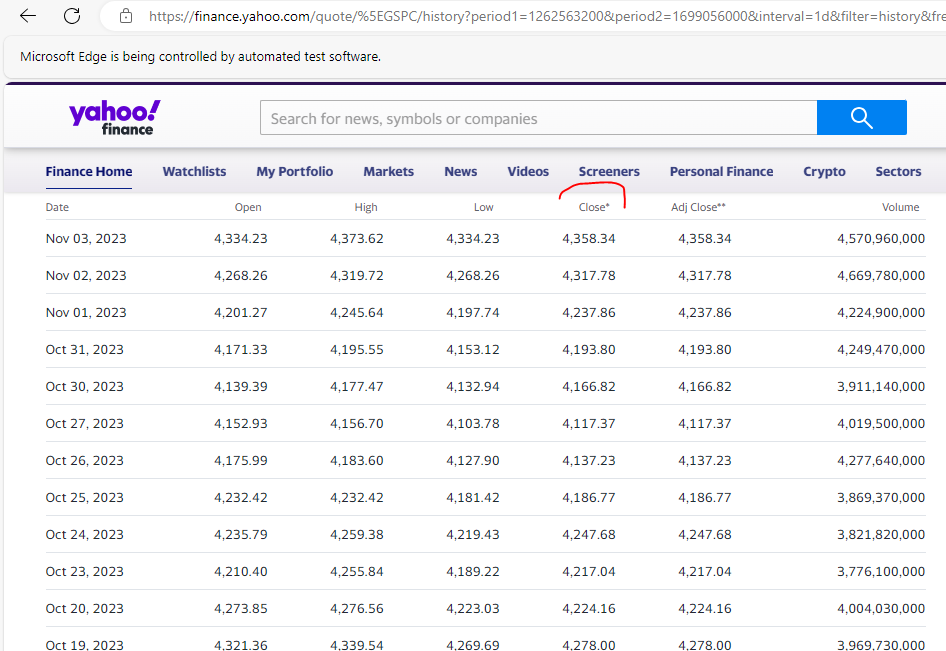

In [12]:
url = 'https://finance.yahoo.com/quote/%5ERUT/history'
output_csv = 'Russell_2000_(RUT).csv'
get_data(url, output_csv, start_date_input, end_date_input)

            time     close
0     03-11-2023  1,760.70
1     02-11-2023  1,714.21
2     01-11-2023  1,669.70
3     31-10-2023  1,662.28
4     30-10-2023  1,647.29
...          ...       ...
3479  08-01-2010    644.56
3480  07-01-2010    641.97
3481  06-01-2010    637.95
3482  05-01-2010    638.49
3483  04-01-2010    640.10

[3484 rows x 2 columns]


In [9]:
url = 'https://finance.yahoo.com/quote/%5ERUT/history'
output_csv = 'Dollar_Index_(DXY).csv'
get_data(url, output_csv, start_date_input, end_date_input)

            time     close
0     03/11/2023  1,760.70
1     02/11/2023  1,714.21
2     01/11/2023  1,669.70
3     31/10/2023  1,662.28
4     30/10/2023  1,647.29
...          ...       ...
3479  08/01/2010    644.56
3480  07/01/2010    641.97
3481  06/01/2010    637.95
3482  05/01/2010    638.49
3483  04/01/2010    640.10

[3484 rows x 2 columns]


In [ ]:
# url = 'https://finance.yahoo.com/quote/EURUSD%3DX/history'
# output_csv = 'EuroUSD_(EUR/USD).csv'
# get_data(url, output_csv, start_date_input, end_date_input)

## Hậu xử lý data cho đồng bộ my_team

In [ ]:
# Russell_2000_(RUT).csv: Lỡ để định dạng 03-11-2023 thay vì 03/11/2023
import pandas as pd
from datetime import datetime

df = pd.read_csv('Russell_2000_(RUT).csv') # Đọc file CSV
# numerical_date = datetime.strptime(date_text, '%b %d, %Y').strftime('%d/%m/%Y')
df['time'] = pd.to_datetime(df['time'], format='%d-%m-%Y').dt.strftime('%d/%m/%Y') # Chuyển đổi định dạng ngày
df.to_csv('Russell_2000_(RUT).csv', index=False) # Ghi lại kết quả vào file CSV

In [18]:
# convert time,close 03/11/2023,"4,358.34" -> date,close 03/11/2023,4358.34

import pandas as pd

def convert_time_close(input_csv): 
    df = pd.read_csv(input_csv) # Đọc file CSV
    df = df.rename(columns={'time': 'date'}) # Đổi tên cột 'time' thành 'date'
    # Chuyển đổi cột 'close' từ chuỗi sang số thực
    df['close'] = df['close'].str.replace(',', '').astype(float) # bỏ dấu phẩy, chuyển .astype(float)
    df.to_csv(input_csv, index=False) # Ghi lại kết quả vào file CSV

convert_time_close('S&P_500_(GSPC).csv')
convert_time_close('Russell_2000_(RUT).csv')
convert_time_close('Dollar_Index_(DXY).csv')

Đổi tên cột 'close' của từng feature về giống tên file: S&P_500_(GSPC); Russell_2000_(RUT); Dollar_Index_(DXY)